<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/NER_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 212 kB 72.9 MB/s 


In [2]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 6.6 MB 64.9 MB/s 


https://analyticsindiamag.com/how-to-perform-named-entity-recognition-ner-using-a-transformer/#:~:text=After%20instantiation%2C%20we%20are%20ready%20to%20use%20bert-base-NER.,name%20is%20yugesh%20and%20I%20live%20in%20India%22

## Importing Libraries

In [8]:
from transformers import AutoTokenizer,AutoModelForTokenClassification
from transformers import pipeline

## Instantiation of BERT
* Use a variant of the BERT model Named Bert-base-NER which is a fine-tuned BERT model for Named Entity Recognition.

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [4]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

## Defining pipeline

In [10]:
NER = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is yugesh and I live in India"

In [11]:
results = NER(example)

In [12]:
results

[{'entity': 'B-PER',
  'score': 0.8005228,
  'index': 4,
  'word': 'y',
  'start': 11,
  'end': 12},
 {'entity': 'B-LOC',
  'score': 0.9997588,
  'index': 11,
  'word': 'India',
  'start': 32,
  'end': 37}]

In [14]:
results = NER("Mr. Narendra Modi gave a fabulous speech on the 75th clebration of Independence Day of India")

In [15]:
results

[{'entity': 'B-PER',
  'score': 0.9995627,
  'index': 3,
  'word': 'Na',
  'start': 4,
  'end': 6},
 {'entity': 'I-PER',
  'score': 0.90164846,
  'index': 4,
  'word': '##ren',
  'start': 6,
  'end': 9},
 {'entity': 'I-PER',
  'score': 0.89562017,
  'index': 5,
  'word': '##dra',
  'start': 9,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.9996189,
  'index': 6,
  'word': 'Mo',
  'start': 13,
  'end': 15},
 {'entity': 'I-PER',
  'score': 0.94701463,
  'index': 7,
  'word': '##di',
  'start': 15,
  'end': 17},
 {'entity': 'B-MISC',
  'score': 0.9948397,
  'index': 22,
  'word': 'Independence',
  'start': 67,
  'end': 79},
 {'entity': 'I-MISC',
  'score': 0.99806327,
  'index': 23,
  'word': 'Day',
  'start': 80,
  'end': 83},
 {'entity': 'I-MISC',
  'score': 0.9982666,
  'index': 24,
  'word': 'of',
  'start': 84,
  'end': 86},
 {'entity': 'I-MISC',
  'score': 0.99818265,
  'index': 25,
  'word': 'India',
  'start': 87,
  'end': 92}]

## This model is trained using the following abbreviation:

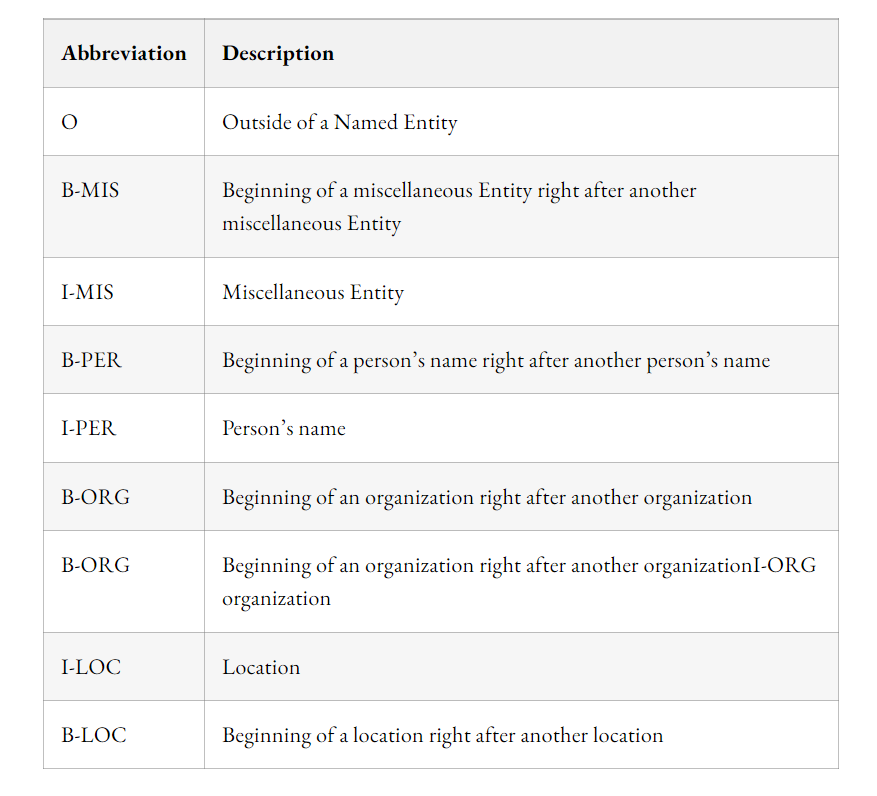

## Spacy

In [2]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
import spacy
nlp =spacy.load("en_core_web_md")

In [4]:
text = "Mr. Narendra Modi gave a fabulous speech on the 75th clebration of Independence Day of India"
doc = nlp(text)
for ent in doc.ents:
    print (f" text : {ent.text}, NER : {ent.label_}")

 text : Narendra Modi, NER : PERSON
 text : 75th, NER : ORDINAL
 text : Independence Day, NER : EVENT
 text : India, NER : GPE


In [5]:
example = "My name is yugesh and I live in India"
doc = nlp(example)
for ent in doc.ents:
    print (f" text : {ent.text}, NER : {ent.label_}")

 text : India, NER : GPE
